<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

The numpy library is used to handle matrixes.

Matplotlib to plot and handle the plots of the data.

In [11]:
GPUBenchmark = np.genfromtxt('GPUBenchmark.csv', delimiter=',') # Read the GPUBenchmark.csv file.
GPUBenchmarkY = GPUBenchmark[:, 6]          # Read all Y-values, and add to np-array.
GPUBenchmarkX = GPUBenchmark[:, 0:6]        # Read all X-values, and add to np-array.
n = len(GPUBenchmarkX)  # Creating the variable n which is the amount of x-data rows.
 #print("X- values: ", GPUBenchmarkY)
 #print("Y-values: ", GPUBenchmarkX)

The needed datas are set here. 

The GPUBenchmark.csv file is read using np.genfromtx.

The data is split into X-features and Y-labels.

<b> Exercise 1.1: Normalizing X using Xn = (X − µ)/σ.  </b>

In [12]:
def normalizeXData(prevData, dataX):
    meanValue = dataX.mean(axis=0) #   Compute mean µi
    stadardDev = dataX.std(axis=0)  #   Compute standard deviation σi
       
    return (prevData - meanValue)/stadardDev     # Compute normalized Xn in as Xn = (X − µ)/σ. 


Xne = np.c_[np.ones((n,1)), normalizeXData(GPUBenchmarkX,GPUBenchmarkX)] # Building extended matrix Xne = [1, Xn]

The function above is used to feature normalize X-data. 

The X-data is recieved, the mean and  the standard deviation is calculated,

and the normalized Xn is returned.

<b> Exercise 1.2: Xi vs y for each one of the features.  </b>

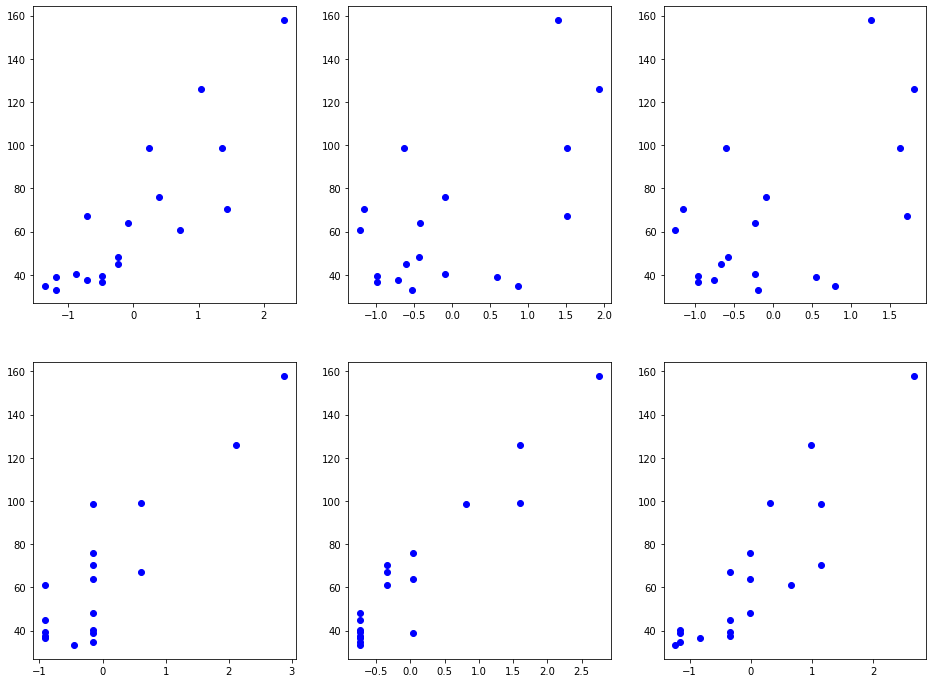

In [13]:
plt.figure(figsize=(16, 12))        # Figure settings.
for i in range(len(GPUBenchmarkX[0])):  # Get the column range.
    plt.subplot(2,3,i+1)        # Current plot.
    plt.plot(normalizeXData(GPUBenchmarkX,GPUBenchmarkX)[:,i],GPUBenchmarkY,'bo') #Ploting Xi vs y.

We are here ploting the normalized X-data with the Y data using for each one of the feature. Y(Xn) = Y

<b> Exercise 1.3: Compute β using the normal equation β = (XTe Xe)−1XTey where Xe is the extended normalized matrix [1, X1, . . . , X6]. </b>

In [14]:
beta =  np.linalg.inv(Xne.T.dot(Xne)).dot(Xne.T).dot(GPUBenchmarkY) # Creating the normal equation beta n β = (XTe Xe)^(−1)XTey
print(beta)

[65.18888889 18.05577085 -5.3521726  13.04504442  4.19572708 10.04004069
  1.26250957]


<b>What is the predicted benchmark result for a graphic card
with the following (non-normalized) feature values?</b>

In [15]:

predictBenchmark = np.array([2432, 1607, 1683, 8, 8, 256])                           # Data that will be predicted.
currentData = []                                                                     # Array holding normalized data.
for i in range(len(GPUBenchmarkX[0])):
     currentData.insert(i,normalizeXData(predictBenchmark[i],GPUBenchmarkX[:, i]))   # Compute normalized Xn in as Xn = (X − µ)/σ. For each X.
   
currentData.insert(0,1)                                                              # Add 1 to index 0, so shape matches beta.
print(np.dot(beta, currentData))                                                     # Print result.

110.80403513783199


The test values are used to predict with given data [2432, 1607, 1683, 8, 8, 256].

Answer: 110.80403513783199

<b> Exercise 1.4: Cost J(β)  using the β computed by the normal equation. </b>

In [16]:
j = np.dot(Xne,beta)-GPUBenchmarkY
J =  (j.T.dot(j))/n #Createing the cost function J(β).
print(J)

12.39644436091566


The J(β) when using the β computed by the normal equation is:<b> 12.39644436091566 </b>

<b> Exercise 1.5: Gradient descent

a)   Find (and print) hyperparameters (α, N) such that you get within 1% of the final cost
for the normal equation. </b>

In [17]:
N = 10000       # Set hyperparameters N.
alpha = 0.01    # Set hyperparameter aplha.
def gradientDescent(Xne, Y, Bj, N, alpha):

    for i in range(N):  # Compute N times.
        Bj = Bj - (np.dot((alpha * Xne.T), ((np.dot(Xne,Bj)) - Y))) # Compute gradient descent  βj+1 = βj − αXT(Xβj − y)

    return Bj          # Return computed Bj.

Bj = np.zeros(len(Xne[0]))  # Set gradient descent start point as B = [0. 0. 0. 0. 0. 0. 0.]
Bgradient = gradientDescent(Xne, GPUBenchmarkY, Bj, N, alpha)       # Recieve B, created using gradient descent.

print("N = ", N)                            # Printing N that gave a 1 % margin.
print("Alpha = ", alpha)                    # Printing the alpha.
print("Error %: ", 100*(1 - (110.80403513783199/np.dot(Bgradient,currentData))))

N =  10000
Alpha =  0.01
Error %:  9.071800854965062e-06



The used hyperpara meter for iterations is, <b>  N =  10000 </b>

The used "α" is Alpha = <b>  0.01 </b>


The eror is < 1 %, <b> (9.071800854965062e-06 %). </b>


<b>b) What is the predicted benchmark result for the example graphic card presented above?
</b>

In [18]:
print(np.dot(Bgradient,currentData))        # Printing the computed value of [2432, 1607, 1683, 8, 8, 256] using the B's from gradient descent.

110.8040451897543



The predicted benchmark result for the example graphic card is: <b> 110.8040451897543 </b>